# Perkenalan

Nama : Muhammad Fauzan

Milestone 2

Phase 1

## Tentang Dataset

Dataset yang digunakan [disini](https://www.kaggle.com/adityakadiwal/water-potability)

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## Objektif

* Mampu memprediksi apakah air dapat dikonsumsi atau tidak berdasarkan fitur-fitur menggunakan model klasifikasi.

# Import Pustaka

In [91]:
# import pustaka
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# Data Loading

Import dataset terlebih dahulu agar dapat diolah.

In [28]:
# import dataset
df = pd.read_csv('/content/water_potability.csv')

Kemudian, lihat 10 data teratas, 10 data terbawah, dan kolom apa saja di dalam dataset.

In [29]:
# 10 data teratas
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [30]:
# 10 data terbawah
df.tail(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [31]:
# cek kolom
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# Data Cleaning

Cek tipe data dan jumlah data dari dataset.

In [32]:
# cek info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Kemudian, cek missing values dari dataset.

In [33]:
# cek missing values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Terlihat bahwa kolom `ph`, `Sulfate`, dan `Trihalomethanes` memiliki missing values.

Cek skewness dari kolom-kolom tersebut.

In [34]:
# skewness kolom-kolom
skew_ph = df['ph'].skew()
skew_sulf = df['Sulfate'].skew()
skew_tri = df['Trihalomethanes'].skew()

print(f'Skewness ph: {skew_ph}')
print(f'Skewness Sulfate: {skew_sulf}')
print(f'Skewness Trihalomethanes: {skew_tri}')

Skewness ph: 0.025630447632210302
Skewness Sulfate: -0.03594662160706183
Skewness Trihalomethanes: -0.08303067407901549


Berdasarkan skewness, ketiga kolom tersebut berdistribusi normal. Isi missing values dengan nilai mean.

In [35]:
# fill missing values with mean
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [36]:
# check missing values (again)
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Kemudian, cek apakah ada nilai duplikat dari dataset.

In [37]:
# check duplicated data
df.duplicated().sum()

0

Cek apakah dataset memiliki outliers.

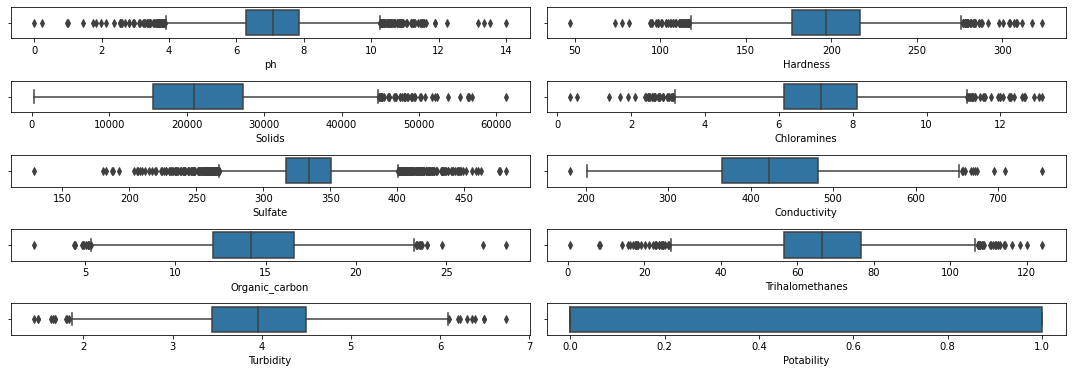

In [39]:
# cek outliers
fig = plt.figure(figsize= (15,10))
for idx,col in enumerate(df.columns,1) :
    ax= fig.add_subplot(10,2,idx)
    sns.boxplot(x=df[col], ax=ax)

plt.tight_layout()

Hilangkan outliers menggunakan metode IQR.

In [40]:
# handling outliers using IQR method
for columns in df.columns:
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[columns] >= Q1 - 1.5 * IQR) & (df[columns] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]

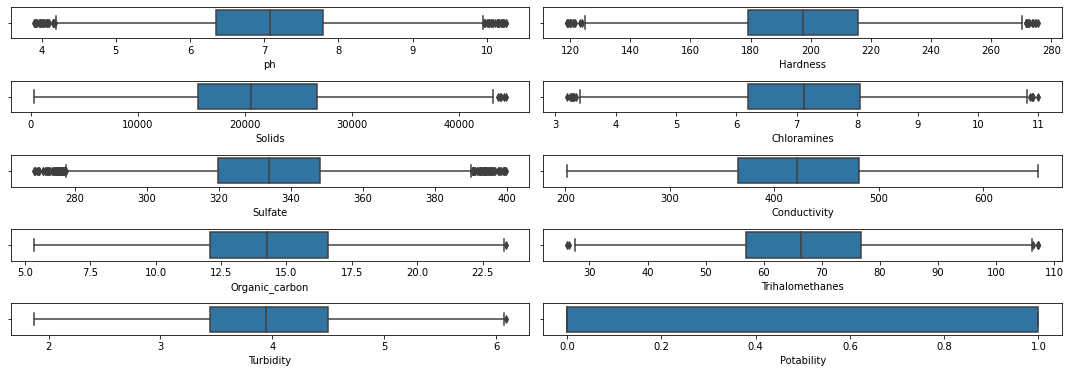

In [41]:
# cek outliers (again)
fig = plt.figure(figsize= (15,10))
for idx,col in enumerate(df.columns,1) :
    ax= fig.add_subplot(10,2,idx)
    sns.boxplot(x=df[col], ax=ax)

plt.tight_layout()

In [42]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2657 non-null   float64
 1   Hardness         2657 non-null   float64
 2   Solids           2657 non-null   float64
 3   Chloramines      2657 non-null   float64
 4   Sulfate          2657 non-null   float64
 5   Conductivity     2657 non-null   float64
 6   Organic_carbon   2657 non-null   float64
 7   Trihalomethanes  2657 non-null   float64
 8   Turbidity        2657 non-null   float64
 9   Potability       2657 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 228.3 KB


# Data Exploration

Kita akan melihat histogram dan KDE dari setiap kolom.

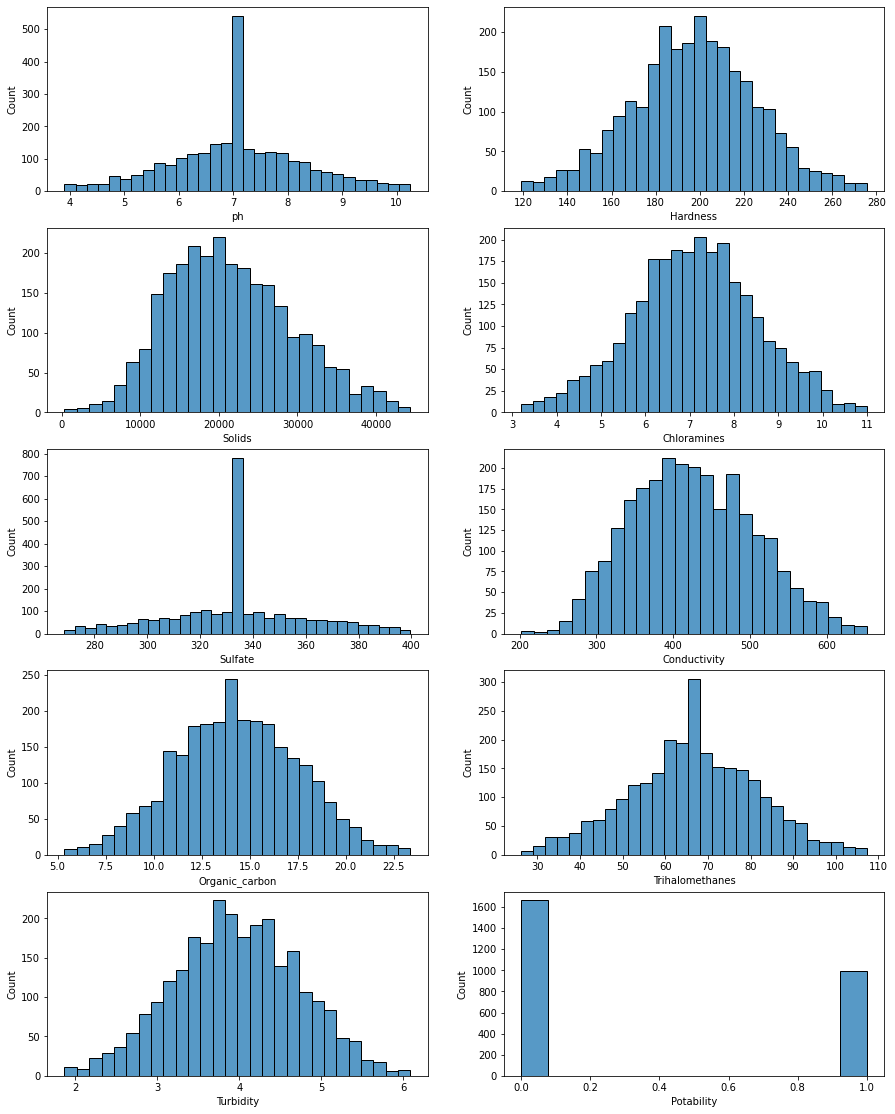

In [51]:
# histogram plot
plt.figure(figsize=(15,40))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(10, 2, i+1)
        sns.histplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

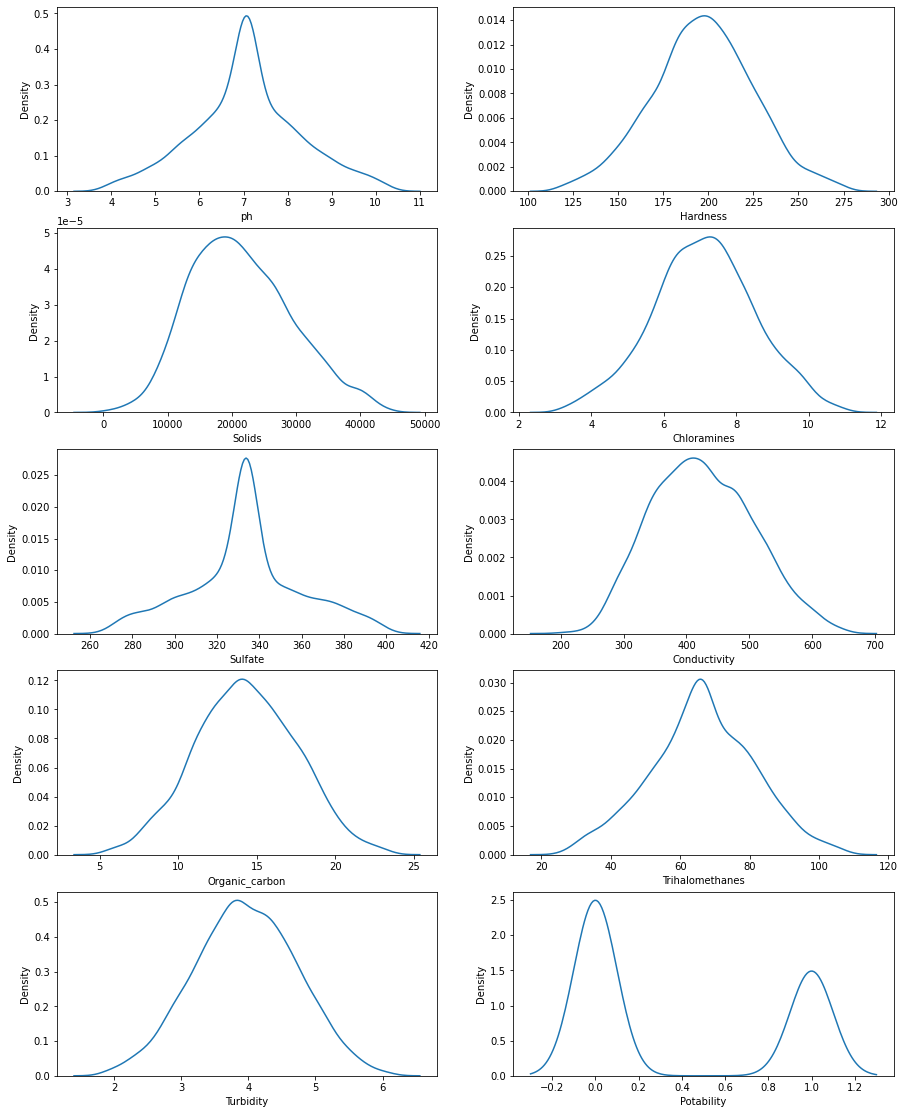

In [52]:
# KDE plot
plt.figure(figsize=(15,40))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(10, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Dari grafik, terlihat bahwa kolom-kolom berdistribusi normal, walaupun terlihat beberapa kurtosis dari beberapa kolom (terutama kolom-kolom yang memiliki missing values diisi dengan nilai mean-nya) sangat tinggi.

Kita akan melihat distribusi air yang dapat dikonsumsi berdasarkan nilai ph.

Text(0.5, 1.0, "Distribution of Water's Potability based on pH")

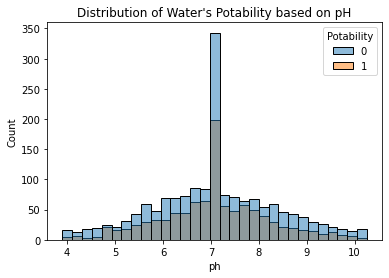

In [56]:
# Distribution of Water's Potability based on pH
sns.histplot(data=df, x=df['ph'], hue=df['Potability'], bins='auto',)
plt.title("Distribution of Water's Potability based on pH")

Kita akan melihat distribusi air yang dapat dikonsumsi berdasarkan nilai Chloramines.

Text(0.5, 1.0, "Distribution of Water's Potability based on Chloramines")

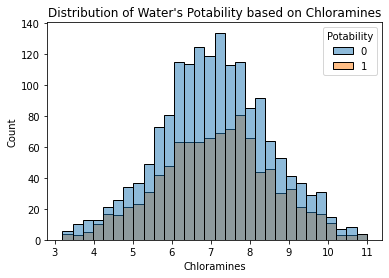

In [59]:
# Distribution of Water's Potability based on Chloramines
sns.histplot(data=df, x=df['Chloramines'], hue=df['Potability'], bins='auto',)
plt.title("Distribution of Water's Potability based on Chloramines")

Kita akan melihat distribusi air yang dapat dikonsumsi berdasarkan nilai Trihalomethanes.

Text(0.5, 1.0, "Distribution of Water's Potability based on Trihalomethanes")

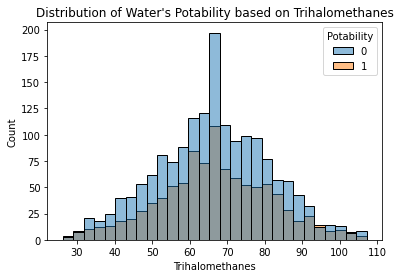

In [60]:
# Distribution of Water's Potability based on Trihalomethanes
sns.histplot(data=df, x=df['Trihalomethanes'], hue=df['Potability'], bins='auto',)
plt.title("Distribution of Water's Potability based on Trihalomethanes")

Kita akan melihat distribusi air yang dapat dikonsumsi berdasarkan nilai Turbidity.

Text(0.5, 1.0, "Distribution of Water's Potability based on Turbidity")

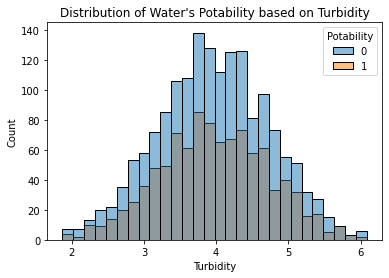

In [61]:
# Distribution of Water's Potability based on Turbidity
sns.histplot(data=df, x=df['Turbidity'], hue=df['Potability'], bins='auto',)
plt.title("Distribution of Water's Potability based on Turbidity")

Note:

* WHO has recommended maximum permissible limit of pH from 6.5 to 8.5

* Chloramines levels up to 4 parts per million (ppm) are considered safe in drinking water.

* Trihalomethanes (THM) levels up to 80 ppm is considered safe in drinking water.

* WHO has recommended value of Turbidity lower than 5 NTU.

Terlihat beberapa nilai dari dataset bahwa air yang dilabelkan dapat dikonsumsi sebenernya tidak dapat dikonsumsi berdasarkan anjuran WHO. Hal ini dapat menimbulkan model yang nantinya memprediksi apakah air dapat dikonsumsi atau tidak, berpotensi menghasilkan prediksi yang tidak sesuai dengan anjuran WHO.

# Data Preprocessing

Cek korelasi terhadap `Potability`

In [62]:
# korelasi terhadap Potability
corr_potability = df.corr()
corr_potability['Potability']

ph                -0.008261
Hardness          -0.000347
Solids             0.007164
Chloramines        0.012948
Sulfate           -0.011607
Conductivity       0.000513
Organic_carbon    -0.030161
Trihalomethanes    0.014416
Turbidity          0.004178
Potability         1.000000
Name: Potability, dtype: float64

Terlihat bahwa korelasi dengan fitur-fiturnya tidak begitu kuat.

Kemudian, definisikan X dan y yang nantinya akan diproses untuk pelatihan model.

In [63]:
# define X and Y
X = df.drop('Potability', axis = 1)
y = df['Potability']

Split data menjadi train-dev-test dengan train test split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, stratify= y)

## Pipeline

In [65]:
# Pipeline for Logistic Regression Model
pipe_lr = Pipeline([("scaler", StandardScaler()), ("lr", LogisticRegression(random_state=42))])

In [67]:
# Pipeline for SVM
pipe_svm = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel='rbf', C=0.5))])

In [68]:
# Pipeline for Random Forest Classifier
pipe_rf = Pipeline([("scaler", StandardScaler()), ("rf", RandomForestClassifier(random_state=42))])

# Pendefinisian Model

## Logistic Regression

In [69]:
print(pipe_lr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(random_state=42))])


## SVM

In [71]:
print(pipe_svm)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=0.5))])


## Random Forest Classifier

In [72]:
print(pipe_rf)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])


# Pelatihan Model

## Logistic Regression

In [73]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(random_state=42))])

In [74]:
# hasil prediksi Logistic Regression
y_pred_lr = pipe_lr.predict(X_test)
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## SVM

In [75]:
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=0.5))])

In [76]:
# hasil prediksi SVM
y_pred_svm = pipe_svm.predict(X_test)
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,

## Random Forest Classifier

In [78]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

In [79]:
# hasil prediksi Random Forest Classifier
y_pred_rf = pipe_svm.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,

# Evaluasi Model

## Logistic Regression

In [104]:
# Test Score
acc_lr = pipe_lr.score(X_test, y_test)
print("Test score: {}".format(acc_lr))

Test score: 0.6265664160401002


In [90]:
# cek menggunakan confusion matrix
print(confusion_matrix(y_test, y_pred_lr))

[[500   0]
 [298   0]]


In [84]:
# cek menggunakan classification report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       500
           1       0.00      0.00      0.00       298

    accuracy                           0.63       798
   macro avg       0.31      0.50      0.39       798
weighted avg       0.39      0.63      0.48       798



## SVM

In [105]:
# Test Score
acc_svm = pipe_svm.score(X_test, y_test)
print("Test score: {}".format(acc_svm))

Test score: 0.6528822055137845


In [92]:
# cek menggunakan confusion matrix
print(confusion_matrix(y_test, y_pred_svm))

[[488  12]
 [265  33]]


In [94]:
# cek menggunakan classification report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       500
           1       0.73      0.11      0.19       298

    accuracy                           0.65       798
   macro avg       0.69      0.54      0.49       798
weighted avg       0.68      0.65      0.56       798



## Random Forest Classifier

In [106]:
# Test Score
acc_rf = pipe_rf.score(X_test, y_test)
print("Test score: {}".format(acc_rf))

Test score: 0.656641604010025


In [100]:
# cek menggunakan confusion matrix
print(confusion_matrix(y_test, y_pred_rf))

[[488  12]
 [265  33]]


In [102]:
# cek menggunakan classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       500
           1       0.73      0.11      0.19       298

    accuracy                           0.65       798
   macro avg       0.69      0.54      0.49       798
weighted avg       0.68      0.65      0.56       798



## Summary of Model Evaluation

Kita akan melihat perbandingan akurasi dari setiap model yang telah kita uji.

In [107]:
# comparison of model
model_accuracy = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Random Forest Classifier'],
    'Test Accuracy': [acc_lr, acc_svm, acc_rf]
})

model_accuracy

,Model,Test Accuracy
0,Logistic Regression,0.626566
1,SVM,0.652882
2,Random Forest Classifier,0.656642


Random Forest Classifier memiliki akurasi tertinggi dibandingkan model lain. Kita akan gunakan model tersebut untuk model improvement

# Model Improvement and Model Saving

## Model Improvement

In [125]:
# define the parameters
param_grid = [
    {'classifier__n_estimators': [50, 100, 150, 200],
     'classifier__min_samples_split': [2, 4, 6, 8, 10],
     'classifier__min_samples_leaf': [1, 2, 3, 4, 5],
     'classifier__criterion': ['entropy','gini']}
]

In [127]:
# define gridsearch
pipe = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier__criterion': ['entropy', 'gini'],
                          'classifier__min_samples_leaf': [1, 2, 3, 4, 5],
                          'classifier__min_samples_split': [2, 4, 6, 8, 10],
                          'classifier__n_estimators': [50, 100, 150, 200]}])

In [128]:
# best parameters from gridsearch
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'classifier__criterion': 'gini', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}


In [129]:
# best cross validation accuracy from gridsearch
print("Best cross-validation accuracy: {}".format(grid.best_score_))

Best cross-validation accuracy: 0.6524954351795496


In [133]:
# test accuracy from gridsearch
print("Test accuracy: {}".format(grid.score(X_test, y_test)))

Test accuracy: 0.6616541353383458


Terlihat bahwa akurasi naik setelah dilakukan model improvement.

## Model Saving

In [132]:
# define new model of Random Forest Classifier with new parameters
rf_improved = grid.best_estimator_
rf_improved

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=4,
                                        min_samples_split=10,
                                        n_estimators=200))])

In [138]:
# hasil prediksi Random Forest Classifier (improved)
y_pred_rf_improved = rf_improved.predict(X_test)
y_pred_rf_improved

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,

In [140]:
# classification report random forest classifier (improved)
print(classification_report(y_test, y_pred_rf_improved))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78       500
           1       0.66      0.20      0.30       298

    accuracy                           0.66       798
   macro avg       0.66      0.57      0.54       798
weighted avg       0.66      0.66      0.60       798



# Model Inference

Kita akan mencoba model-model yang telah kita latih menggunakan data baru.

In [134]:
df.min()

ph                   3.902476
Hardness           118.988579
Solids             320.942611
Chloramines          3.194969
Sulfate            268.646941
Conductivity       201.619737
Organic_carbon       5.362371
Trihalomethanes     26.140863
Turbidity            1.872573
Potability           0.000000
dtype: float64

In [135]:
df.max()

ph                    10.252816
Hardness             275.679780
Solids             44376.187382
Chloramines           10.999995
Sulfate              399.617217
Conductivity         652.537592
Organic_carbon        23.373265
Trihalomethanes      107.306343
Turbidity              6.083772
Potability             1.000000
dtype: float64

In [136]:
# data baru
a = [[7.25, 150, 20000, 3.9, 270, 400, 7, 70, 3]]

# define result using Logistic Regression
result_lr = pipe_lr.predict(a)

# define result using SVM
result_svm = pipe_svm.predict(a)

# define result using Random Forest Classifier
result_rf = pipe_rf.predict(a)

# define result using Random Forest Classifer (improved)
result_rf_improved = rf_improved.predict(a)

In [137]:
# results
print('prediction from Logistic Regression: {}'.format(result_lr))
print('prediction from SVM: {}'.format(result_svm))
print('prediction from Random Forest Classifier: {}'.format(result_rf))
print('prediction from Random Forest Classifier (improved): {}'.format(result_rf_improved))

prediction from Logistic Regression: [0]
prediction from SVM: [1]
prediction from Random Forest Classifier: [1]
prediction from Random Forest Classifier (improved): [1]


# Kesimpulan

## Model Analysis

### Logistic Regression

* Model Logistic Regression memiliki akurasi sebesar 62.65%, tergolong lumayan kecil.

* Nilai f1-score saat prediksi air dapat dikonsumsi (value: 1) adalah 0%. Berarti model Logistic Regression sama sekali tidak mampu memprediksi jika air dapat dikonsumsi.

### SVM

* Model SVM memiliki akurasi sebesar 65.28%, tergolong lumayan kecil.

* Nilai f1-score saat prediksi air dapat dikonsumsi (value: 1) adalah 19%. Dapat disimpulkan bahwa prediksi air yang dapat dikonsumsi dari model SVM banyak yang berbeda dengan data aktual.

### Random Forest Classifier

* Model Random Forest Classifier memiliki akurasi sebesar 65.66%, tergolong lumayan kecil.

* Nilai f1-score saat prediksi air dapat dikonsumsi (value: 1) adalah 19%. Dapat disimpulkan bahwa prediksi air yang dapat dikonsumsi dari model Random Forest Classifier banyak yang berbeda dengan data aktual.

### Random Forest Classifier (improved)

* Model Random Forest Classifier memiliki akurasi sebesar 66.16%, tergolong lumayan kecil.

* Nilai f1-score saat prediksi air dapat dikonsumsi (value: 1) adalah 30%. Dapat disimpulkan bahwa prediksi air yang dapat dikonsumsi dari model Random Forest Classifier (improved) banyak yang berbeda dengan data aktual, walaupun tergolong lebih baik dibandingkan model lainnya.

## Overall Analysis

* Dilihat dari korelasi fitur-fitur, tidak ada korelasi yang begitu kuat terhadap `Potability` sehingga tidak ada suatu fitur yang dominan mempengaruhi apakah air layak dikonsumsi atau tidak layak dikonsumsi.

* Setelah dilakukan model improvement terhadap Random Forest Classifier, terlihat bahwa akurasi naik sebesar 0.5% dan juga nilai f1-score saat prediksi air dapat dikonsumsi (value: 1) naik lumayan pesat, sebelumnya hanya 19% menjadi 30%.

* Dapat disimpulkan bahwa model-model yang diuji masih belum pantas untuk diimplementasikan karena probabilitas benar memprediksi air dapat dikonsumsi (value: 1) masih sangat rendah.